# Comparison between different LCII estimates
In this notebook, we compare the [C II] luminosities available in SIDES (De Looze and Lagache) with the ones that we can obtain from the different configurations we test for the SFR-LCII relation. First we import the Python packages.

In [1]:
import numpy as np
import matplotlib.pylab as plt
from astropy.table import Table

## Read SIDES data
We read the pySIDES original data

In [2]:
# This file is very large, so we recommend downloading the file yourself
cat = Table.read('pySIDES_from_original.fits', format='fits')

We also read the coefficients calculated for the paper, the ones with only the HII regions and the one applied in the DiagISM web app with a Multi-layer Perceptron (MLP)

In [3]:
estimated_linreg = Table.read('../data/raw/coeff_linreg.csv',
                              format='ascii.csv')
estimated_linreg_HII = Table.read('../data/raw/coeff_linreg_HII.csv',
                                  format='ascii.csv')  # In case HII
estimated_MLPreg = Table.read('../data/interim/coeff_MLPreg.csv',
                              format='ascii.csv')

# Dictionaries to create the analog of the lines names
linreg_lines = {'CII158': 'logLCII', 'NIII': 'logLNIII_57',
                'NII205': 'logLNII_205', 'NII122': 'logLNII_122',
                'OI145': 'logLOI_145',  'OI63': 'logLOI_63',
                'OIII88': 'logLOIII_88', 'OIII52': 'logLOIII_51'}
inv_linreg_lines = {v: k for k, v in linreg_lines.items()}

## Check information of the catalogue
We print some information of the SIDES catalogue to add into the text.

In [4]:
print('Size catalogue: %i' % len(cat))

Size catalogue: 5584998


In [5]:
cat.to_pandas().describe()

,redshift,ra,dec,Mhalo,Mstar,SFR,mu,Dlum,Umean,LIR,...,ICO54,ICO65,ICO76,ICO87,LCII_Lagache,ICII_Lagache,LCII_de_Looze,ICII_de_Looze,ICI10,ICI21
count,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,...,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06
mean,2.734982e+00,7.039533e-01,6.972193e-01,1.064088e+11,9.092136e+08,1.372681e+00,9.540521e-01,2.400558e+04,2.971599e+01,1.372681e+10,...,1.177584e-02,7.891975e-03,5.098844e-03,3.182408e-03,2.844697e+07,2.742033e-01,1.747779e+07,1.278091e-01,6.853084e-03,6.157696e-03
std,1.484305e+00,4.041831e-01,4.038262e-01,7.740619e+11,7.074330e+09,1.246749e+01,2.571228e-01,1.522744e+04,2.375179e+01,1.246749e+11,...,1.015527e-01,7.686822e-02,5.980459e-02,5.120688e-02,4.619592e+08,6.037699e+00,1.759584e+08,1.739894e+00,6.901437e-02,7.367227e-02
min,2.546800e-02,0.000000e+00,0.000000e+00,7.618732e+07,1.000001e+07,0.000000e+00,1.093528e-01,1.148970e+02,7.369455e-01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.510977e+00,3.536190e-01,3.476190e-01,2.057080e+10,1.645674e+07,2.566594e-02,8.841814e-01,1.129854e+04,1.213790e+01,2.566594e+08,...,5.019205e-04,3.101368e-04,1.810549e-04,9.432232e-05,9.055122e+04,4.041218e-04,2.805908e+05,1.195736e-03,2.477126e-04,1.874166e-04
50%,2.750341e+00,7.054865e-01,6.967940e-01,3.748378e+10,3.332762e+07,7.083349e-02,9.621357e-01,2.345478e+04,2.317521e+01,7.083349e+08,...,1.223309e-03,7.641071e-04,4.502033e-04,2.363470e-04,3.378791e+05,1.316501e-03,8.287925e+05,3.581995e-03,6.536252e-04,5.277129e-04
75%,3.610307e+00,1.054712e+00,1.044422e+00,7.359735e+10,1.119962e+08,2.496243e-01,1.009233e+00,3.249175e+04,4.037457e+01,2.496243e+09,...,3.678409e-03,2.340999e-03,1.410486e-03,7.628284e-04,1.530489e+06,6.468762e-03,3.025991e+06,1.456303e-02,2.065889e-03,1.737407e-03
max,9.993294e+00,1.400000e+00,1.400000e+00,4.190855e+14,3.997949e+11,9.999269e+02,5.714846e+01,1.060595e+05,3.923683e+02,9.999269e+12,...,8.019424e+01,5.039512e+01,3.719604e+01,3.719604e+01,2.006014e+11,3.538015e+03,3.033352e+10,1.494375e+03,7.493182e+01,5.979519e+01


We compare the distribution at the two redshifts where we are estimating the number of counts

(0.1, 4000000.0)

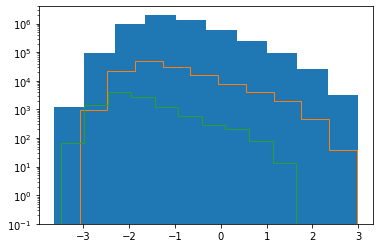

In [6]:
z1 = np.logical_and.reduce([cat['redshift'] >= 1.3, cat['redshift'] <= 1.4,
                            cat['SFR'] > 0])
z2 = np.logical_and.reduce([cat['redshift'] >= 0.29, cat['redshift'] <= 0.32,
                            cat['SFR'] > 0])

plt.hist(np.log10(cat['SFR'][cat['SFR'] > 0]))
plt.hist(np.log10(cat['SFR'][z1]), histtype='step')
plt.hist(np.log10(cat['SFR'][z2]), histtype='step')
plt.yscale('log')
plt.ylim(1e-1, 4e6)

## Estimate luminosities with MLP
We calculate the log(1+z) and log(SFR) from the SIDES catalog. With this we can estimate the expected line luminosity for the galaxies in the catalog.

In [7]:
logz = np.log10(1 + cat['redshift'])
logsfr = np.log10(cat['SFR'])

for line in linreg_lines:
    row = np.where(estimated_linreg['line'] == linreg_lines[line])[0]
    cat['L'+line] = (estimated_linreg['Intercept'][row] +
                     estimated_linreg['cSFR'][row]*logsfr +
                     estimated_linreg['clogz'][row]*logz +
                     estimated_linreg['cSFRlogz'][row]*logz*logsfr)
for line in linreg_lines:
    row = np.where(estimated_linreg_HII['line'] == linreg_lines[line])[0]
    cat['LHII'+line] = (estimated_linreg_HII['Intercept'][row] +
                        estimated_linreg_HII['cSFR'][row]*logsfr +
                        estimated_linreg_HII['clogz'][row]*logz +
                        estimated_linreg_HII['cSFRlogz'][row]*logz*logsfr)

for line in linreg_lines:
    row = np.where(estimated_MLPreg['line'] == linreg_lines[line])[0]
    cat['LMLP'+line] = (estimated_MLPreg['Intercept'][row] +
                        estimated_MLPreg['cSFR'][row]*logsfr +
                        estimated_MLPreg['cSFR2'][row]*logsfr*logsfr +
                        estimated_MLPreg['clogz'][row]*logz +
                        estimated_MLPreg['cSFRlogz'][row]*logz*logsfr)

<ipython-input-7-779a9b2b6742>:2: RuntimeWarning: divide by zero encountered in log10
  logsfr = np.log10(cat['SFR'])
<ipython-input-7-779a9b2b6742>:6: RuntimeWarning: invalid value encountered in add
  cat['L'+line] = (estimated_linreg['Intercept'][row] +
<ipython-input-7-779a9b2b6742>:12: RuntimeWarning: invalid value encountered in add
  cat['LHII'+line] = (estimated_linreg_HII['Intercept'][row] +
<ipython-input-7-779a9b2b6742>:19: RuntimeWarning: invalid value encountered in add
  cat['LMLP'+line] = (estimated_MLPreg['Intercept'][row] +


## Comparison plots
Different plots to show the results and the comparison between other estimates

Text(0, 0.5, '$\\log$(Luminosity [C II] [L$_\\odot$])')

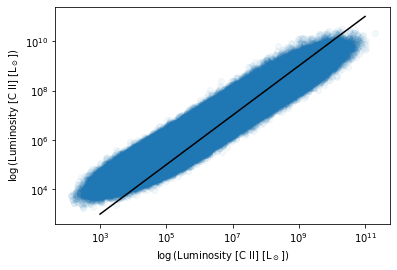

In [8]:
plt.scatter(cat['LCII_Lagache'], cat['LCII_de_Looze'], alpha=0.05)
plt.plot([1e3, 1e11], [1e3, 1e11], c='k')
plt.loglog()
plt.xlabel(r'$\log$(Luminosity [C II] [L$_\odot$])')
plt.ylabel(r'$\log$(Luminosity [C II] [L$_\odot$])')

Text(0, 0.5, '$\\log$(Luminosity [C II] [L$_\\odot$])')

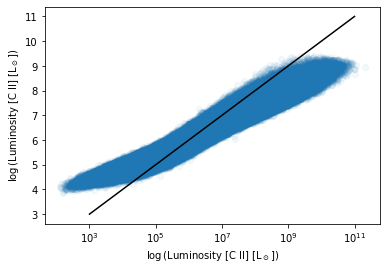

In [9]:
plt.scatter(cat['LCII_Lagache'], cat['LCII158'], alpha=0.05)
plt.plot([1e3, 1e11], [3, 11], c='k')
plt.xscale('log')
plt.xlabel(r'$\log$(Luminosity [C II] [L$_\odot$])')
plt.ylabel(r'$\log$(Luminosity [C II] [L$_\odot$])')

Text(0, 0.5, '$\\log$(Luminosity [C II] [L$_\\odot$])')

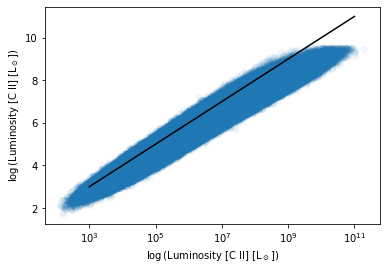

In [10]:
plt.scatter(cat['LCII_Lagache'], cat['LMLPCII158'], alpha=0.05)
plt.plot([1e3, 1e11], [3, 11], c='k')
plt.xscale('log')
plt.xlabel(r'$\log$(Luminosity [C II] [L$_\odot$])')
plt.ylabel(r'$\log$(Luminosity [C II] [L$_\odot$])')

Text(0, 0.5, '$\\log$(Luminosity [C II] [L$_\\odot$])')

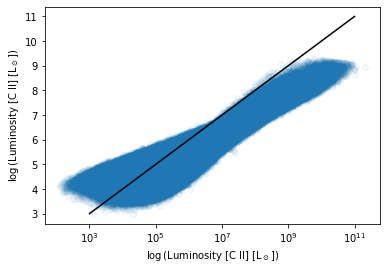

In [11]:
plt.scatter(cat['LCII_Lagache'], cat['LHIICII158'], alpha=0.05)
plt.plot([1e3, 1e11], [3, 11], c='k')
plt.xscale('log')
plt.xlabel(r'$\log$(Luminosity [C II] [L$_\odot$])')
plt.ylabel(r'$\log$(Luminosity [C II] [L$_\odot$])')

Finally, we compare the luminosity of [C II] that we get from the catalogue

<ipython-input-12-8f5cc801f2f8>:15: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(cat['LCII_de_Looze']), bins=binned_lum,
<ipython-input-12-8f5cc801f2f8>:17: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(cat['LCII_Lagache']), bins=binned_lum,


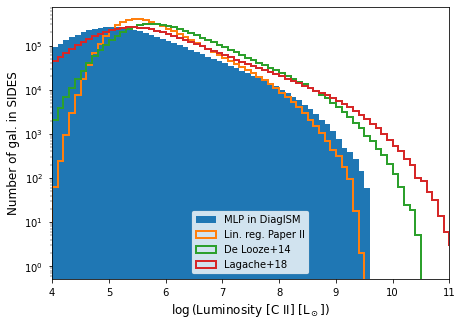

In [12]:
binned_lum = np.linspace(3, 12, 91)
with plt.style.context(('seaborn-paper')):
    plt.rcParams.update({'font.size': 12})
    plt.rcParams.update({'axes.labelsize': 12})
    plt.rcParams.update({'legend.fontsize': 10})
    plt.rcParams.update({'ytick.labelsize': 10})
    plt.rcParams.update({'xtick.labelsize': 10})
    plt.figure(figsize=(3.56*2, 5))
    plt.hist((cat['LMLPCII158']), bins=binned_lum,
             label='MLP in DiagISM')
    plt.hist((cat['LCII158']), bins=binned_lum,
             histtype='step', lw=2, label='Lin. reg. Paper II')
#     plt.hist((cat['LHIICII158']), bins=binned_lum,
#              histtype='step', lw=2, label='Lin. reg. HII regions')
    plt.hist(np.log10(cat['LCII_de_Looze']), bins=binned_lum,
             histtype='step', lw=2, label='De Looze+14')
    plt.hist(np.log10(cat['LCII_Lagache']), bins=binned_lum,
             histtype='step', lw=2, label='Lagache+18')
    # plt.yscale('log')
    plt.legend(loc='lower center')
    plt.xlabel(r'$\log$(Luminosity [C II] [L$_\odot$])')
    plt.ylabel('Number of gal. in SIDES')
    plt.xlim(4, 11)
    plt.ticklabel_format(axis="y", style="scientific", scilimits=(0, 0))
    plt.yscale('log')
    plt.savefig('../figures/Comparison_LCII.pdf',
                dpi=300, bbox_inches='tight')  # For Paper

We also plot another estimations

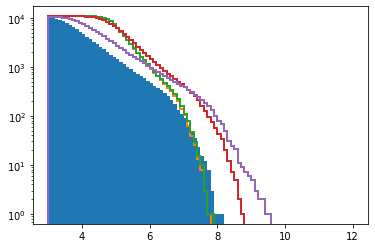

In [13]:
plt.hist((cat['LMLPCII158'][z2]), bins=binned_lum,
         label='MLP in DiagISM', cumulative=-1,)
plt.hist((cat['LCII158'][z2]), bins=binned_lum,
         histtype='step', lw=2, label='Lin. reg. all phases', cumulative=-1,)
# plt.hist((cat['LHIICII158'][z2]), bins=binned_lum,
#          histtype='step', lw=2, label='Lin. reg. HII regions', cumulative=-1,)
plt.hist(np.log10(cat['LCII_de_Looze'][z2]), bins=binned_lum,
         histtype='step', lw=2, label='De Looze+14', cumulative=-1,)
plt.hist(np.log10(cat['LCII_Lagache'][z2]), bins=binned_lum,
         histtype='step', lw=2, label='Lagache+18', cumulative=-1,)
plt.yscale('log')
plt.xlabel(r'$\log$(Luminosity [C II] [L$_\odot$])')
plt.ylabel('Number of gal. in SIDES')

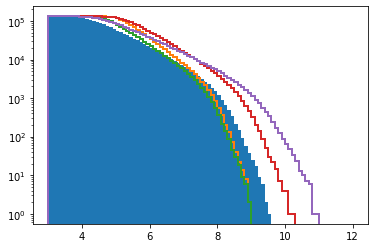

In [14]:
plt.hist((cat['LMLPCII158'][z1]), bins=binned_lum,
         label='MLP in DiagISM', cumulative=-1,)
plt.hist((cat['LCII158'][z1]), bins=binned_lum,
         histtype='step', lw=2, label='Lin. reg. all phases', cumulative=-1,)
# plt.hist((cat['LHIICII158'][z1]), bins=binned_lum,
#          histtype='step', lw=2, label='Lin. reg. HII regions', cumulative=-1,)
plt.hist(np.log10(cat['LCII_de_Looze'][z1]), bins=binned_lum,
         histtype='step', lw=2, label='De Looze+14', cumulative=-1,)
plt.hist(np.log10(cat['LCII_Lagache'][z1]), bins=binned_lum,
         histtype='step', lw=2, label='Lagache+18', cumulative=-1,)
plt.yscale('log')
plt.xlabel(r'$\log$(Luminosity [C II] [L$_\odot$])')
plt.ylabel('Number of gal. in SIDES')

##### Notebook info

In [15]:
%load_ext watermark
%watermark -a "Andres Ramos" -d -v -m
print('Specific Python packages')
%watermark -iv -w 

Author: Andres Ramos

Python implementation: CPython
Python version       : 3.8.3
IPython version      : 7.16.1

Compiler    : GCC 7.3.0
OS          : Linux
Release     : 3.10.0-1160.59.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Specific Python packages
matplotlib: 3.4.3
numpy     : 1.22.1
json      : 2.0.9
autopep8  : 1.5.7

Watermark: 2.2.0

